# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings 
warnings.filterwarnings ('ignore')

# Reading Data

In [2]:
data = pd.read_csv('Obesity dataset.csv')
data

,Gender,Age,Height,Weight,OFM,HCFC,MIV,NMPD,FBM,SMOKE,WCIL,MCC,PAIW,CALC,MOT,BMI
0,Female,21,1.62,64.00,yes,no,2,3,Sometimes,no,2,no,0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3,3,Sometimes,yes,3,yes,3,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2,3,Sometimes,no,2,no,2,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3,3,Sometimes,no,2,no,2,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2,1,Sometimes,no,2,no,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3,3,Sometimes,no,2,no,2,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3,3,Sometimes,no,2,no,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3,3,Sometimes,no,2,no,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3,3,Sometimes,no,3,no,1,Sometimes,Public_Transportation,Obesity_Type_III


# Overview of the data

In [3]:
data.shape

(2111, 16)

In [4]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'OFM', 'HCFC', 'MIV', 'NMPD',
       'FBM', 'SMOKE', 'WCIL', 'MCC', 'PAIW', 'CALC', 'MOT', 'BMI'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2111 non-null   object 
 1   Age     2111 non-null   int64  
 2   Height  2111 non-null   float64
 3   Weight  2111 non-null   float64
 4   OFM     2111 non-null   object 
 5   HCFC    2111 non-null   object 
 6   MIV     2111 non-null   int64  
 7   NMPD    2111 non-null   int64  
 8   FBM     2111 non-null   object 
 9   SMOKE   2111 non-null   object 
 10  WCIL    2111 non-null   int64  
 11  MCC     2111 non-null   object 
 12  PAIW    2111 non-null   int64  
 13  CALC    2111 non-null   object 
 14  MOT     2111 non-null   object 
 15  BMI     2111 non-null   object 
dtypes: float64(2), int64(5), object(9)
memory usage: 264.0+ KB


In [6]:
data.Age.describe() 

count    2111.000000
mean       24.315964
std         6.357078
min        14.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        61.000000
Name: Age, dtype: float64

# Data Visualisation

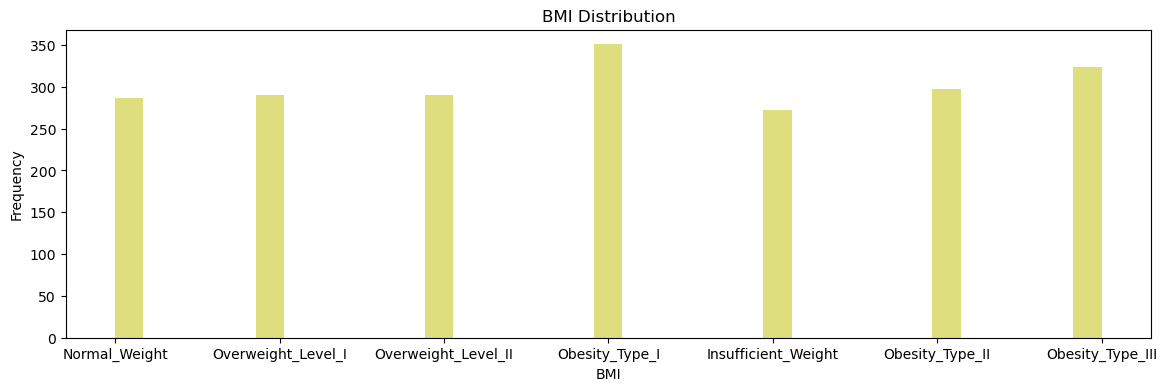

In [7]:
plt.figure(figsize=(14, 4))
plt.hist(data['BMI'], bins=35, color='y',alpha = 0.5)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

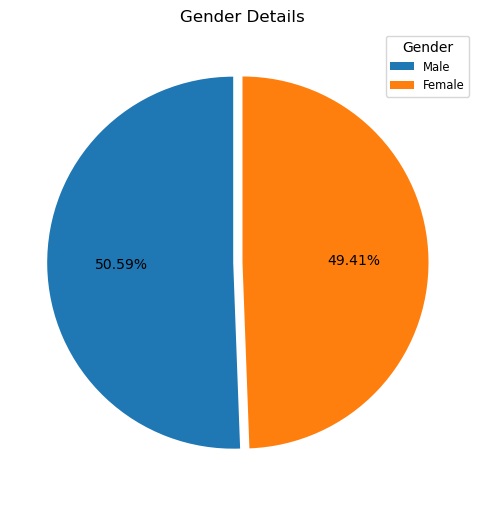

In [8]:
gender = data['Gender'].value_counts()
plt.figure(figsize=(6,12))
plt.pie(gender,autopct='%1.2f%%',startangle=90,explode = (0.05,0))
plt.title('Gender Details')
plt.legend(labels = gender.index,title="Gender",loc='upper right',fontsize = 'small')
plt.show()

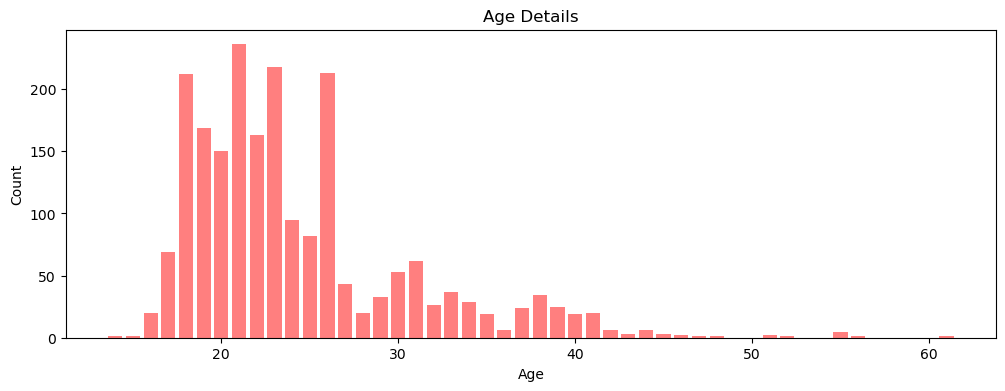

In [9]:
age = data['Age'].value_counts()
plt.figure(figsize=(12, 4))
plt.bar(age.index,age.values, color='r',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Details')
plt.show()

# Label Encoding

In [10]:
label = LabelEncoder()

In [11]:
data.Gender = label.fit_transform(data.Gender)
data.OFM = label.fit_transform(data.OFM)
data.HCFC = label.fit_transform(data.HCFC)
data.FBM = label.fit_transform(data.FBM)
data.SMOKE = label.fit_transform(data.SMOKE)
data.MCC = label.fit_transform(data.MCC)
data.CALC = label.fit_transform(data.CALC)
data.MOT = label.fit_transform(data.MOT)
data.BMI = label.fit_transform(data.BMI)

In [12]:
data

,Gender,Age,Height,Weight,OFM,HCFC,MIV,NMPD,FBM,SMOKE,WCIL,MCC,PAIW,CALC,MOT,BMI
0,0,21,1.62,64.00,1,0,2,3,2,0,2,0,0,3,3,1
1,0,21,1.52,56.00,1,0,3,3,2,1,3,1,3,2,3,1
2,1,23,1.80,77.00,1,0,2,3,2,0,2,0,2,1,3,1
3,1,27,1.80,87.00,0,0,3,3,2,0,2,0,2,1,4,5
4,1,22,1.78,89.80,0,0,2,1,2,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3,3,2,0,2,0,2,2,3,4
2107,0,22,1.75,133.74,1,1,3,3,2,0,2,0,1,2,3,4
2108,0,23,1.75,133.69,1,1,3,3,2,0,2,0,1,2,3,4
2109,0,24,1.74,133.35,1,1,3,3,2,0,3,0,1,2,3,4


In [13]:
data.dtypes

Gender      int32
Age         int64
Height    float64
Weight    float64
OFM         int32
HCFC        int32
MIV         int64
NMPD        int64
FBM         int32
SMOKE       int32
WCIL        int64
MCC         int32
PAIW        int64
CALC        int32
MOT         int32
BMI         int32
dtype: object

# Defining Dependent and Independent variables

In [14]:
x = data.iloc[:,:-1]
x # Independent variables

,Gender,Age,Height,Weight,OFM,HCFC,MIV,NMPD,FBM,SMOKE,WCIL,MCC,PAIW,CALC,MOT
0,0,21,1.62,64.00,1,0,2,3,2,0,2,0,0,3,3
1,0,21,1.52,56.00,1,0,3,3,2,1,3,1,3,2,3
2,1,23,1.80,77.00,1,0,2,3,2,0,2,0,2,1,3
3,1,27,1.80,87.00,0,0,3,3,2,0,2,0,2,1,4
4,1,22,1.78,89.80,0,0,2,1,2,0,2,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3,3,2,0,2,0,2,2,3
2107,0,22,1.75,133.74,1,1,3,3,2,0,2,0,1,2,3
2108,0,23,1.75,133.69,1,1,3,3,2,0,2,0,1,2,3
2109,0,24,1.74,133.35,1,1,3,3,2,0,3,0,1,2,3


In [15]:
y = data.iloc[:,-1:]
y # Dependent Variable

,BMI
0,1
1,1
2,1
3,5
4,6
...,...
2106,4
2107,4
2108,4
2109,4


# Train test split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=0)

# Building model (Hyper Parameter Tuning)

In [17]:
model_params={'random forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,5,10,50,100]}},
              'logistic_regression':{'model':LogisticRegression(),'params':{'C':[1,5,10,45,89]}},
             'knn':{'model': KNeighborsClassifier(),'params':{'n_neighbors':[3,5,7,10,15]}}}

In [18]:
scores=[]
models=['random forest', 'logistic_regression','knn']
for model_name in models:
    mp=model_params[model_name] 
    gscv=GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=True)
    gscv.fit(xtrain,ytrain)
    scores.append({'model':model_name,'best_score':gscv.best_score_,"best_params":gscv.best_params_})

In [19]:
pd.DataFrame(scores)

,model,best_score,best_params
0,random forest,0.939442,{'n_estimators': 100}
1,logistic_regression,0.654555,{'C': 1}
2,knn,0.867825,{'n_neighbors': 3}


# Training and evaluating model

In [20]:
model = SVC(C = 40, gamma= 'auto', kernel='linear')

In [21]:
model.fit(xtrain,ytrain)

SVC(C=40, gamma='auto', kernel='linear')

In [22]:
model.score(xtrain,ytrain)

0.9720905739863086

In [23]:
score = model.score(xtest,ytest)

In [24]:
print('Accuracy is ',score)

Accuracy is  0.9811320754716981


In [25]:
pred = model.predict(xtest)

# Confusion matrix and Classification report 

In [26]:
cm=confusion_matrix(ytest,pred)
cm

array([[25,  1,  0,  0,  0,  0,  0],
       [ 2, 18,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  0,  0,  0, 28]], dtype=int64)

<Axes: >

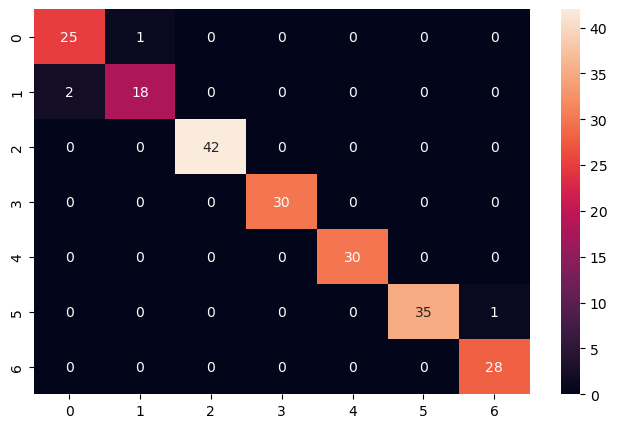

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [28]:
cr= classification_report(ytest,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.95      0.90      0.92        20
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      0.97      0.99        36
           6       0.97      1.00      0.98        28

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212



# User input prediction

In [29]:
# x=int(input('''DO YOU LIKE TO PREDICT YOUR OWN DATA !!!
# '0.No'
# '1.Yes'
# '''))
# if x ==0:
#     print('Thank you !')
# elif x==1:

#     Gender = int(input('''
#     0.Female
#     1.Male 
#     '''))
#     Age = int(input('Enter Age: '))
#     Height = float(input('Enter your height in Meters: '))
#     Weight = float(input('Enter weight in kgs: '))
#     OFM = int(input('''Family members with obesity:
#     0.No
#     1.Yes
#     '''))
#     HCFC = int(input('''High calorie food consumption:
#     0.No
#     1.Yes
#     '''))
#     MIV = int(input('Meals including vegetables in a day: '))
#     NMPD = int(input('No.of meals per day: '))
#     FBM = int(input('''Food between meals: 
#     0.Always
#     1.Frequently
#     2.Never
#     3.Sometimes
#     '''))
#     SMOKE = int(input('''Smoking habit:
#     0.No
#     1.Yes
#     '''))
#     WCIL = int(input('Water consumption in litres per day: '))
#     MCC = int(input('''Do you monitor your calorie consumption: 
#     0.No
#     1.Yes
#     '''))
#     PAIW = int(input('Days with physical activity in a week:'))
#     CALC = int(input('''Alcohol intake :
#     0.Always
#     1.Frequently
#     2.Never
#     3.Sometimes
#     ''')) 
#     MOT = int(input('''Mode of transportation:
#     0.Atomobile
#     1.Bike
#     2.Motorbike
#     3.Public Transport
#     4.Walking
#     '''))

#     prediction_data = [Gender,Age,Height,Weight,OFM,HCFC,MIV,NMPD,FBM,SMOKE,WCIL,MCC,PAIW,CALC,MOT]
#     prediction_data
# else:
#     print('Input is invalid !')
    
# print('--------------------------------------')

# if model.predict([prediction_data])==[0]:
#     print('You may have Insufficient Weight')
# elif model.predict([prediction_data])==[1]:
#     print('You may have Normal Weight')
# elif model.predict([prediction_data])==[2]:
#     print('You may have Obesity Type_I')
# elif model.predict([prediction_data])==[3]:
#     print('You may have Obesity Type_II')
# elif model.predict([prediction_data])==[4]:
#     print('You may have Obesity Type_III')
# elif model.predict([prediction_data])==[5]:
#     print('You may have Overweight Level_I')
# elif model.predict([prediction_data])==[6]:
#     print('You may have Overweight Level_II')